In [7]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from afinn import Afinn
from pattern.en import sentiment
nltk.download('vader_lexicon')
nltk.download('punkt')
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense, concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from keras.layers import BatchNormalization
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from keras.layers import Embedding, GRU, Dense, concatenate, Input
from keras.regularizers import l1_l2
from keras.models import Sequential
import tensorflow.compat.v1 as tf

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/faizelahmed/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/faizelahmed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
df=pd.read_csv('truthseeker_emotions.csv')

In [9]:
df.head(3)

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer,anger,disgust,fear,joy,neutral,sadness,surprise
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree,0,0,0,0,0,1,0
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree,0,0,0,0,0,1,0
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree,0,0,0,0,0,1,0


In [10]:
df['textblob'] = df['statement'].apply(lambda x: TextBlob(x).sentiment.polarity)
afinn = Afinn()
df['afinn'] = df['statement'].apply(lambda x: afinn.score(x))
df['pattern'] = df['statement'].apply(lambda x: sentiment(x)[0])
analyzer = SentimentIntensityAnalyzer()

df['vader'] = df['statement'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [11]:
df.head(3)

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer,anger,disgust,fear,joy,neutral,sadness,surprise,textblob,afinn,pattern,vader
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree,0,0,0,0,0,1,0,0.0,-1.0,0.0,-0.6908
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree,0,0,0,0,0,1,0,0.0,-1.0,0.0,-0.6908
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree,0,0,0,0,0,1,0,0.0,-1.0,0.0,-0.6908


In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

In [13]:
selected_columns = ['statement', 'BinaryNumTarget', 'anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise',
                    'afinn', 'pattern', 'vader', 'textblob']

In [14]:
data = df[selected_columns]


In [15]:
data

,statement,BinaryNumTarget,anger,disgust,fear,joy,neutral,sadness,surprise,afinn,pattern,vader,textblob
0,End of eviction moratorium means millions of A...,1.0,0,0,0,0,0,1,0,-1.0,0.0,-0.6908,0.0
1,End of eviction moratorium means millions of A...,1.0,0,0,0,0,0,1,0,-1.0,0.0,-0.6908,0.0
2,End of eviction moratorium means millions of A...,1.0,0,0,0,0,0,1,0,-1.0,0.0,-0.6908,0.0
3,End of eviction moratorium means millions of A...,1.0,0,0,0,0,0,1,0,-1.0,0.0,-0.6908,0.0
4,End of eviction moratorium means millions of A...,1.0,0,0,0,0,0,1,0,-1.0,0.0,-0.6908,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134193,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,1,0,0,0,0,0,0,0.0,0.0,-0.3182,0.0
134194,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,1,0,0,0,0,0,0,0.0,0.0,-0.3182,0.0
134195,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,1,0,0,0,0,0,0,0.0,0.0,-0.3182,0.0
134196,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,1,0,0,0,0,0,0,0.0,0.0,-0.3182,0.0


In [16]:
df1=df

In [17]:
duplicates = df1[df1.duplicated(subset=['statement'], keep=False)].sum()

# Display the duplicate rows
print(duplicates)

Unnamed: 0                                                        9002629269
author                     D.L. DavisD.L. DavisD.L. DavisD.L. DavisD.L. D...
statement                  End of eviction moratorium means millions of A...
target                                                                 68911
BinaryNumTarget                                                      68911.0
manual_keywords            Americans, eviction moratoriumAmericans, evict...
tweet                      @POTUS Biden Blunders - 6 Month Update\n\nInfl...
5_label_majority_answer    Mostly AgreeNO MAJORITYAgreeMostly AgreeAgreeA...
3_label_majority_answer    AgreeAgreeAgreeAgreeAgreeAgreeAgreeAgreeAgreeA...
anger                                                                  12384
disgust                                                                16788
fear                                                                    6739
joy                                                                     2825

In [18]:
df1.drop_duplicates(subset=['statement'], inplace=True)


In [19]:
df1['BinaryNumTarget'] = df1['BinaryNumTarget'].astype(int)

In [20]:
emotions_columns = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
df1[emotions_columns] = df1[emotions_columns].astype(float)

In [21]:
df1.dropna(inplace=True)

In [22]:
df1.head(1)

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer,anger,disgust,fear,joy,neutral,sadness,surprise,textblob,afinn,pattern,vader
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,-0.6908


In [23]:
X_text = df1['statement'].values
X_emotions = df1[['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']].values
X_scores = df1[['afinn', 'pattern', 'vader', 'textblob']].values
y = df1['BinaryNumTarget'].values


In [24]:
statements = df1['statement']

max_len_text = max(len(statement.split()) for statement in statements)

print("Maximum length of statements:", max_len_text)

Maximum length of statements: 48


In [25]:
max_len_text = max_len_text  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text)
sequences = tokenizer.texts_to_sequences(X_text)
X_text_pad = pad_sequences(sequences, maxlen=max_len_text)

In [26]:
embedding_dim = 100  
vocab_size = len(tokenizer.word_index) + 1


In [27]:
from sklearn.model_selection import StratifiedKFold

In [28]:
def create_model():
    model_text = Sequential()
    model_text.add(Embedding(vocab_size, embedding_dim, input_length=max_len_text))
    model_text.add(Bidirectional(LSTM(128))) 

    model_emotions = Sequential()
    model_emotions.add(Dense(64, input_shape=(7,)))  # 7 features for emotions 
    model_scores = Sequential()
    model_scores.add(Dense(64, input_shape=(4,)))  # 4 features for sentiment scores

    merged = concatenate([model_text.output, model_emotions.output, model_scores.output])
    merged = Dense(64, activation='relu')(merged)
    output = Dense(1, activation='sigmoid')(merged)

    model = tf.keras.models.Model(inputs=[model_text.input, model_emotions.input, model_scores.input], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [29]:
n_splits = 5  
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


In [30]:
for fold, (train_index, test_index) in enumerate(skf.split(X_text_pad, y)):
    print(f"Training Fold {fold+1}...")

    X_train_text, X_test_text = X_text_pad[train_index], X_text_pad[test_index]
    X_train_emotions, X_test_emotions = X_emotions[train_index], X_emotions[test_index]
    X_train_scores, X_test_scores = X_scores[train_index], X_scores[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model()
    model.fit([X_train_text, X_train_emotions, X_train_scores], y_train, epochs=10, batch_size=32, verbose=1)


Training Fold 1...
Epoch 1/10


2023-08-03 23:02:15.939133: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


27/27 [==============================] - 2s 25ms/step - loss: 0.6854 - accuracy: 0.5544
Epoch 2/10
27/27 [==============================] - 1s 27ms/step - loss: 0.5474 - accuracy: 0.7210
Epoch 3/10
27/27 [==============================] - 1s 27ms/step - loss: 0.2129 - accuracy: 0.9149
Epoch 4/10
27/27 [==============================] - 1s 28ms/step - loss: 0.0389 - accuracy: 0.9929
Epoch 5/10
27/27 [==============================] - 1s 28ms/step - loss: 0.0071 - accuracy: 0.9988
Epoch 6/10
27/27 [==============================] - 1s 26ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 7/10
27/27 [==============================] - 1s 28ms/step - loss: 7.7547e-04 - accuracy: 1.0000
Epoch 8/10
27/27 [==============================] - 1s 26ms/step - loss: 3.6759e-04 - accuracy: 1.0000
Epoch 9/10
27/27 [==============================] - 1s 30ms/step - loss: 2.6102e-04 - accuracy: 1.0000
Epoch 10/10
27/27 [==============================] - 1s 27ms/step - loss: 1.9769e-04 - accuracy: 1.0000
Trai

In [31]:
    loss, accuracy = model.evaluate([X_test_text, X_test_emotions, X_test_scores], y_test, batch_size=32)
    predictions = model.predict([X_test_text, X_test_emotions, X_test_scores])
    predictions = (predictions > 0.5).astype(int)


7/7 [==============================] - 0s 8ms/step


In [32]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [33]:
    tn, fp, fn, tp = tf.math.confusion_matrix(y_test, predictions).numpy().ravel()
    accuracy_scores.append((tp + tn) / (tp + tn + fp + fn))
    precision_scores.append(tp / (tp + fp))
    recall_scores.append(tp / (tp + fn))
    f1_scores.append(2 * tp / (2 * tp + fp + fn))

    print(f'Fold {fold+1} - Test Accuracy: {accuracy_scores[-1]:.4f}, Precision: {precision_scores[-1]:.4f}, Recall: {recall_scores[-1]:.4f}, F1-score: {f1_scores[-1]:.4f}')


Fold 5 - Test Accuracy: 0.7583, Precision: 0.7712, Recall: 0.7913, F1-score: 0.7811


In [34]:
print(f'\nAverage Test Accuracy: {np.mean(accuracy_scores):.4f}')
print(f'Average Precision: {np.mean(precision_scores):.4f}')
print(f'Average Recall: {np.mean(recall_scores):.4f}')
print(f'Average F1-score: {np.mean(f1_scores):.4f}')


Average Test Accuracy: 0.7583
Average Precision: 0.7712
Average Recall: 0.7913
Average F1-score: 0.7811


In [35]:
from sklearn.metrics import classification_report

In [36]:
best_fold = np.argmax(accuracy_scores)
X_train_text, X_test_text = X_text_pad[train_index], X_text_pad[test_index]
X_train_emotions, X_test_emotions = X_emotions[train_index], X_emotions[test_index]
X_train_scores, X_test_scores = X_scores[train_index], X_scores[test_index]
y_train, y_test = y[train_index], y[test_index]

best_model = create_model()
best_model.fit([X_train_text, X_train_emotions, X_train_scores], y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
27/27 [==============================] - 2s 24ms/step - loss: 0.6727 - accuracy: 0.5868
Epoch 2/10
27/27 [==============================] - 1s 28ms/step - loss: 0.5035 - accuracy: 0.7544
Epoch 3/10
27/27 [==============================] - 1s 28ms/step - loss: 0.1675 - accuracy: 0.9339
Epoch 4/10
27/27 [==============================] - 1s 27ms/step - loss: 0.0366 - accuracy: 0.9870
Epoch 5/10
27/27 [==============================] - 1s 28ms/step - loss: 0.0190 - accuracy: 0.9917
Epoch 6/10
27/27 [==============================] - 1s 26ms/step - loss: 0.0318 - accuracy: 0.9917
Epoch 7/10
27/27 [==============================] - 1s 28ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 8/10
27/27 [==============================] - 1s 28ms/step - loss: 6.9433e-04 - accuracy: 1.0000
Epoch 9/10
27/27 [==============================] - 1s 26ms/step - loss: 3.9393e-04 - accuracy: 1.0000
Epoch 10/10
27/27 [==============================] - 1s 27ms/step - loss: 2.8634e-04 - accuracy: 1.00

In [37]:
loss, accuracy = best_model.evaluate([X_test_text, X_test_emotions, X_test_scores], y_test, batch_size=32)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions
predictions = best_model.predict([X_test_text, X_test_emotions, X_test_scores])
predictions = (predictions > 0.5).astype(int)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

7/7 [==============================] - 0s 8ms/step - loss: 1.1328 - accuracy: 0.7441
Test Loss: 1.1328, Test Accuracy: 0.7441
7/7 [==============================] - 0s 10ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        96
           1       0.77      0.76      0.76       115

    accuracy                           0.74       211
   macro avg       0.74      0.74      0.74       211
weighted avg       0.74      0.74      0.74       211



In [38]:
best_model.save('fake_news_detection_LSTM.h5')

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['statement'], df['BinaryNumTarget'], test_size=0.2, random_state=42)


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
# Convert text data into TF-IDF for NB and PAC
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [43]:
# Convert text data into sequences for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
word_index = tokenizer.word_index
X_train_seq = pad_sequences(sequences_train, maxlen=1000)
X_test_seq = pad_sequences(sequences_test, maxlen=1000)

In [44]:
from sklearn.naive_bayes import MultinomialNB


In [45]:
# Train a MultinomialNB classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [47]:
# Train a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()
pac.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier()

In [48]:
import numpy as np


In [49]:
# Generate predictions from both models
nb_train_preds = np.expand_dims(nb.predict(X_train_tfidf), axis=-1)
nb_test_preds = np.expand_dims(nb.predict(X_test_tfidf), axis=-1)
pac_train_preds = np.expand_dims(pac.predict(X_train_tfidf), axis=-1)
pac_test_preds = np.expand_dims(pac.predict(X_test_tfidf), axis=-1)

In [50]:
# Create LSTM model
embedding_dim = 100
sequence_input = Input(shape=(1000,), dtype='int32')
nb_input = Input(shape=(1,))
pac_input = Input(shape=(1,))

embedded_sequences = Embedding(len(word_index) + 1, embedding_dim, input_length=1000)(sequence_input)
x = LSTM(128)(embedded_sequences)
x = concatenate([x, Dense(1)(nb_input), Dense(1)(pac_input)])  # Add predictions as features
x = Dense(64, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)

model = Model([sequence_input, nb_input, pac_input], preds)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [51]:
# Train the model
model.fit([X_train_seq, nb_train_preds, pac_train_preds], y_train, epochs=10, batch_size=32, validation_data=([X_test_seq, nb_test_preds, pac_test_preds], y_test))

Epoch 1/10
27/27 [==============================] - 14s 499ms/step - loss: 0.6084 - accuracy: 0.7695 - val_loss: 0.6011 - val_accuracy: 0.8066
Epoch 2/10
27/27 [==============================] - 13s 490ms/step - loss: 0.4672 - accuracy: 0.9385 - val_loss: 0.4912 - val_accuracy: 0.7642
Epoch 3/10
27/27 [==============================] - 13s 487ms/step - loss: 0.2298 - accuracy: 0.9267 - val_loss: 0.5134 - val_accuracy: 0.7877
Epoch 4/10
27/27 [==============================] - 13s 495ms/step - loss: 0.0676 - accuracy: 0.9787 - val_loss: 0.7042 - val_accuracy: 0.7736
Epoch 5/10
27/27 [==============================] - 13s 490ms/step - loss: 0.0167 - accuracy: 0.9976 - val_loss: 0.8762 - val_accuracy: 0.7783
Epoch 6/10
27/27 [==============================] - 13s 483ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.9929 - val_accuracy: 0.7736
Epoch 7/10
27/27 [==============================] - 13s 486ms/step - loss: 4.0319e-04 - accuracy: 1.0000 - val_loss: 1.0605 - val_accuracy: 0.

In [52]:
from sklearn.metrics import classification_report

In [53]:
# After training the model
y_test_preds = model.predict([X_test_seq, nb_test_preds, pac_test_preds])
y_test_preds = np.round(y_test_preds)  # round the predictions to 0 or 1

7/7 [==============================] - 1s 141ms/step


In [54]:
report = classification_report(y_test, y_test_preds, digits=2)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        87
           1       0.85      0.79      0.82       125

    accuracy                           0.79       212
   macro avg       0.79      0.79      0.79       212
weighted avg       0.80      0.79      0.79       212



In [55]:
model.save('ensemble_model_LSTM.h5')

In [56]:
import pickle

In [57]:
# Save the Naive Bayes classifier
with open('nb_classifier.pkl', 'wb') as f:
    pickle.dump(nb, f)

# Save the Passive Aggressive classifier
with open('pac_classifier.pkl', 'wb') as f:
    pickle.dump(pac, f)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [58]:
print("Shape of y_test:", y_test.shape)
print("Shape of predictions:", predictions.shape)


Shape of y_test: (212,)
Shape of predictions: (211, 1)


7/7 [==============================] - 1s 141ms/step


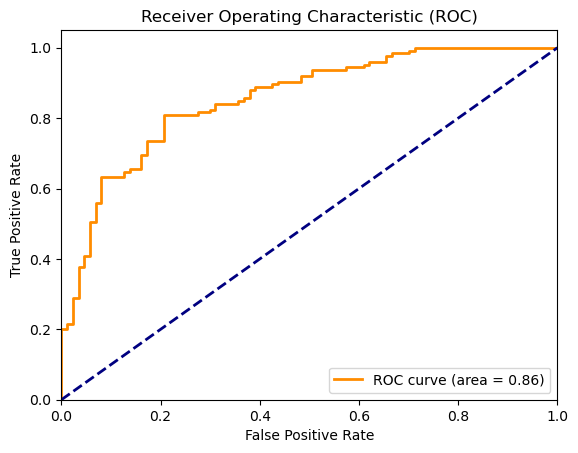

Confusion Matrix:
[[69 18]
 [26 99]]


In [59]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# ...

y_test_probs = model.predict([X_test_seq, nb_test_preds, pac_test_preds])

fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Compute and print confusion matrix
y_test_preds = np.round(y_test_probs)  # round the probabilities to 0 or 1
conf_matrix = confusion_matrix(y_test, y_test_preds)
print("Confusion Matrix:")
print(conf_matrix)


7/7 [==============================] - 1s 133ms/step


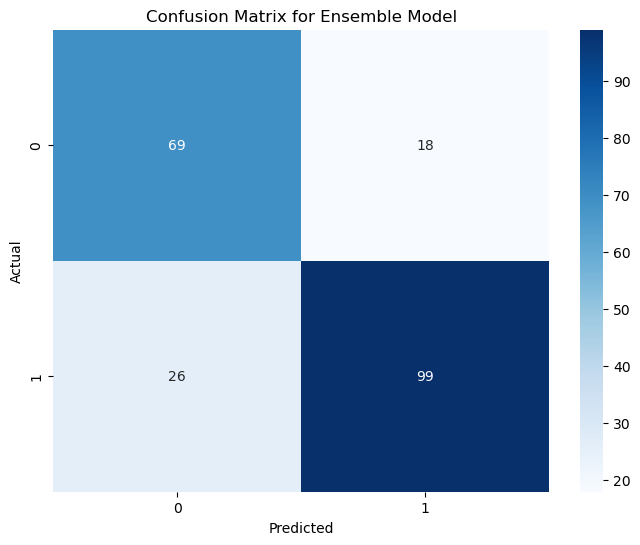

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicting the classes (0 or 1) for the test set
y_test_preds = model.predict([X_test_seq, nb_test_preds, pac_test_preds])
y_test_preds = np.round(y_test_preds).astype(int)  # Rounding the probabilities to get class labels

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_preds)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()


7/7 [==============================] - 1s 139ms/step


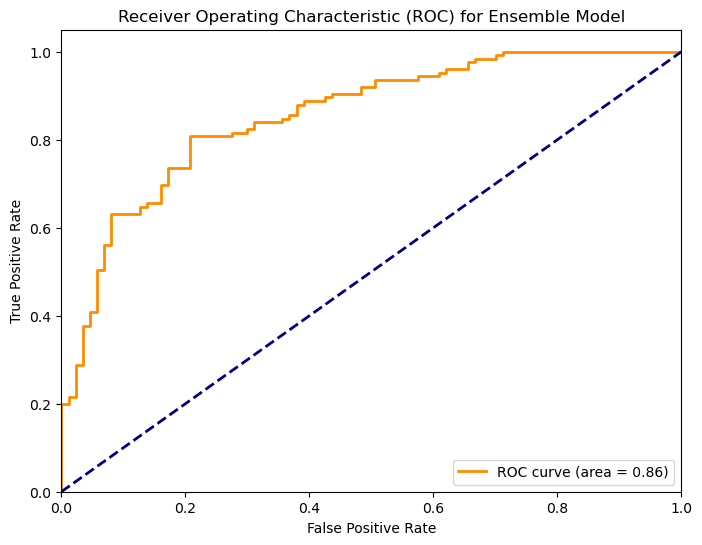

AUC: 0.8552643678160918


In [62]:
from sklearn.metrics import roc_curve, auc

# Predicting the probabilities for the test set
y_test_probs = model.predict([X_test_seq, nb_test_preds, pac_test_preds]).squeeze()

# Calculating the ROC curve for the ensemble model
fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Ensemble Model')
plt.legend(loc='lower right')
plt.show()

# Print the AUC value
print('AUC:', roc_auc)


In [63]:
from keras.layers import Input, Embedding, LSTM, Dense, concatenate
from keras.models import Model


In [64]:
# Define the LSTM model with additional inputs for Scikit-learn predictions
embedding_dim = 100
sequence_input = Input(shape=(1000,), dtype='int32')
nb_input = Input(shape=(1,))
pac_input = Input(shape=(1,))

In [65]:
embedded_sequences = Embedding(len(word_index) + 1, embedding_dim, input_length=1000)(sequence_input)
x = LSTM(128)(embedded_sequences)
x = concatenate([x, Dense(1)(nb_input), Dense(1)(pac_input)])  # Add predictions as features
x = Dense(64, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)


In [66]:
model = Model([sequence_input, nb_input, pac_input], preds)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [67]:
# Train the model
model.fit([X_train_seq, nb_train_preds, pac_train_preds], y_train, epochs=10, batch_size=32, validation_data=([X_test_seq, nb_test_preds, pac_test_preds], y_test))


Epoch 1/10
27/27 [==============================] - 14s 489ms/step - loss: 0.5872 - accuracy: 0.7955 - val_loss: 0.6100 - val_accuracy: 0.7547
Epoch 2/10
27/27 [==============================] - 13s 484ms/step - loss: 0.4674 - accuracy: 0.9858 - val_loss: 0.5502 - val_accuracy: 0.7547
Epoch 3/10
27/27 [==============================] - 13s 493ms/step - loss: 0.2433 - accuracy: 0.9456 - val_loss: 0.5426 - val_accuracy: 0.7736
Epoch 4/10
27/27 [==============================] - 13s 484ms/step - loss: 0.0652 - accuracy: 0.9775 - val_loss: 0.5912 - val_accuracy: 0.7689
Epoch 5/10
27/27 [==============================] - 13s 486ms/step - loss: 0.0221 - accuracy: 0.9976 - val_loss: 0.7996 - val_accuracy: 0.7877
Epoch 6/10
27/27 [==============================] - 13s 485ms/step - loss: 0.1529 - accuracy: 0.9669 - val_loss: 0.5492 - val_accuracy: 0.7170
Epoch 7/10
27/27 [==============================] - 13s 487ms/step - loss: 0.0732 - accuracy: 0.9941 - val_loss: 0.6500 - val_accuracy: 0.7358

In [68]:
# Save the ensemble model to an h5 file
model.save('ensemble_model_LSTM.h5')